In [1]:
from mylib.utils.misc import plot_voxel_enhance
from mylib.dataloader import dataset1
from mylib.dataloader import dataset 
#from mylib.dataloader.dataset import ClfSegDataset, get_balanced_loader, get_loader
import train
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
clf_seg_dataset = dataset1.ClfSegDataset(crop_size=32, subset=[0,1,3])

In [4]:
#x1=np.load('./mylib/dataloader/data/dataset/sjtu-ee228-2020/train_val/candidate1.npz')
#x1.files
x2=dataset1.get_balanced_loader(clf_seg_dataset,20)


In [4]:
vox=x1['voxel']
se=x1['seg']
print(vox.shape)

(100, 100, 100)


In [3]:
train_num=len(clf_seg_dataset)
x_train= np.ones((train_num,32,32,32,1))
y_train= np.ones((train_num,1))
print(x_train.shape)
i=0
while i<train_num:
    x_train[i],(y_train[i],seg)=clf_seg_dataset[i]
    i+=1



(297, 32, 32, 32, 1)


In [5]:
test_dataset = dataset.ClfSegDataset(crop_size=32, subset=[0])
test_num=len(test_dataset)
x_test= np.ones((test_num,32,32,32,1))
#y_train= np.ones((train_num,1))
i=0
while i<test_num:
    x_test[i],(y_test,seg)=test_dataset[i]
    i+=1
print(x_test.shape)
y_test


(117, 32, 32, 32, 1)


[False, False]

In [5]:
import os
name = dataset.TEST_INFO.loc[:, 'name']
test_num=len(name)
xs = np.empty((test_num,*(32,32,32), 1))

for i in range(test_num):
        with np.load(os.path.join(dataset.TEST_PATH, '%s.npz' % name[i])) as npz:
            voxel=npz['voxel'][34:66,34:66,34:66]
            voxel=np.expand_dims(voxel,axis=-1)
            xs[i,]=voxel
x_test=xs
print(x_test.shape)

(117, 32, 32, 32, 1)


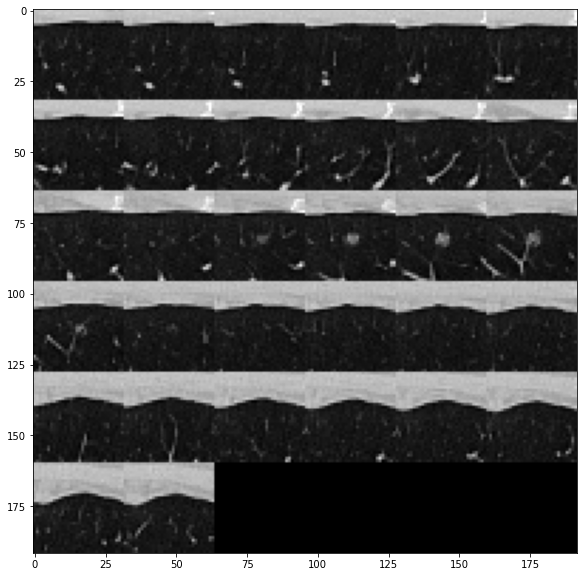

In [37]:
x=x_test[[0]]
plot_voxel_enhance(x.squeeze())

In [19]:
import os
name = dataset.INFO.loc[:, 'name']
valNum=len(name)
xs = np.empty((300,*(32,32,32), 1))
ys=np.empty((300,*(1,2)))
for i in range(300):
        with np.load(os.path.join(dataset.PATH.nodule_path, '%s.npz' % name[i])) as npz:
            voxel=npz['voxel'][34:66,34:66,34:66]
            voxel=np.expand_dims(voxel,axis=-1)
            xs[i,]=voxel
            ys[i,]=dataset.INFO.loc[i, 'label']

xVal=xs
yVal=ys
print(yVal.shape)
yVal[[80]]

(300, 1, 2)


array([[[1., 1.]]])

In [17]:
x,(y,seg)=clf_seg_dataset[4]
print(x.shape)
print(y)
print(seg.shape)

NameError: name 'clf_seg_dataset' is not defined

In [9]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,2)

In [64]:
y_train[[1]]

array([[1., 0.]], dtype=float32)

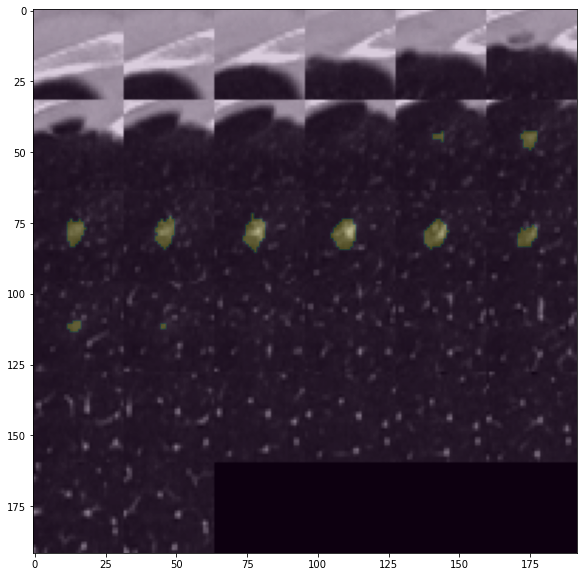

In [35]:
plot_voxel_enhance(x.squeeze(), seg.squeeze(), alpha=0.2)

# The interactive 3D nodule mesh plot

In [9]:
# from IPython.display import HTML
# from mylib.utils.plot3d import plotly_3d_scan_to_html

In [10]:
# plotly_3d_scan_to_html(seg.squeeze(),"tmp.html",step_size=3, zyx_range=((0,32),)*3)
# HTML("tmp.html")

# Create the models * 3D DenseSharp* and * 3D DenseNet*

In [4]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
print("TensorFlow version",tf.__version__)
print("Keras version",keras.__version__)


TensorFlow version 2.0.0
Keras version 2.3.1


In [5]:
from mylib.models.misc import set_gpu_usage
set_gpu_usage()

In [6]:
from mylib.models import densenet, densesharp

In [7]:
densenet_model = densenet.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000018B688EB168>, 'bn_scale': True, 'weight_decay': 0.0001, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000018B19FD1048>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 2}
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32, 32, 32, 1 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 3

In [28]:
densesharp_model = densesharp.get_compiled()

Model hyper-parameters: {'activation': <function <lambda> at 0x0000017E5BB4F288>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000017E031C1C18>, 'dhw': [32, 32, 32], 'k': 16, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32, 32, 32, 1 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv3d_28 (Conv3D)   

In [29]:
densesharp_model = densesharp.get_compiled(k=32)

Model hyper-parameters: {'activation': <function <lambda> at 0x0000017E5BB4F288>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000017E031C1C18>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 3, 'dropout_rate': None}
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 32, 32, 32, 1 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv3d_55 (Conv3D)   

In [45]:
#y_train_pred=densesharp_model.predict(x_train)
yy=np.array(y_train)
y_sque = np.squeeze(yy)
score=densesharp_model.evaluate(x_train,y_train)
print("Accuracy = ", scores[1])

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., ...

In [24]:
un=np.array(y_train)

In [13]:
#un=un[[0,2]]
yy=y_train[[0,2,78]]
#print(y_sque.shape)
print('x_train:',x_train.shape)
yy

x_train: (297, 32, 32, 32, 1)


array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [46]:
print(y_train.shape)
y_train[[1,1]]


NameError: name 'y_train' is not defined

In [4]:
from keras.utils import to_categorical
val_dataset=dataset1.ClfSegDataset(crop_size=32, subset=[2])
val_num=len(val_dataset)
x_val= np.ones((val_num,32,32,32,1))
y_val= np.ones((val_num,1))
print(x_val.shape)
i=0
while i<val_num:
    x_val[i],(y_val[i],seg)=val_dataset[i]
    i+=1

y_val=to_categorical(y_val,2)

(168, 32, 32, 32, 1)


In [10]:
densenet_model.fit(x_train,
              y_train,
              epochs=5,
              validation_split=0.3,
              shuffle=False,
              batch_size=4,
                   callbacks=callback_lists
              )

ValueError: Error when checking target: expected dense_1 to have shape (2,) but got array with shape (1,)

In [26]:
import h5py
print("Saving model to disk \n")
mp = ".\TrainedModel\log\densenetModel1.h5"
densenet_model.save(mp)

Saving model to disk 



In [1]:
from keras.models import load_model
model= load_model('./TrainedModel/densenetModel1.h5')
#val_pre = model.predict(x_val, batch_size=5, verbose=1)
#score=model.evaluate
val_pre=model.predict(x_val,batch_size=3,verbose=1)


Using TensorFlow backend.


NameError: name 'x_val' is not defined

In [8]:
print(val_pre.shape)
val_pre[[7]]

(168, 2)


array([[0.8794901, 0.1205099]], dtype=float32)

In [44]:
print(test_pre.shape)
test_pre[[1]]

(117, 2)


array([[0.31502712, 0.6849729 ]], dtype=float32)

In [8]:

checkpoint = keras.callbacks.ModelCheckpoint(filepath='.\TrainedModel\densenet',monitor='val_acc',mode='auto' ,save_best_only='True')
tensorboard =keras.callbacks.TensorBoard(log_dir='.\TrainedModel\densenet\log')
callback_lists=[tensorboard,checkpoint]


In [31]:
densesharp_model.fit(x_train,
              y_train,
              epochs=10,
              validation_data=(x_val, y_val),
              shuffle=True,
              batch_size=5,
              callbacks=callback_lists
              )

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., ...

In [38]:
train.main(batch_sizes=[3, 5, 8, 8],
         crop_size=[32, 32, 32],
         random_move=3,
         learning_rate=1.e-4,
         segmentation_task_ratio=0.2,
         weight_decay=0.,
         save_folder='test',
         epochs=10)

Model hyper-parameters: {'activation': <function <lambda> at 0x0000019DD11040D8>, 'bn_scale': True, 'weight_decay': 0.0, 'kernel_initializer': 'he_uniform', 'first_scale': <function <lambda> at 0x0000019D83CA49D8>, 'dhw': [32, 32, 32], 'k': 32, 'bottleneck': 4, 'compression': 2, 'first_layer': 32, 'down_structure': [4, 4, 4], 'output_size': 2, 'dropout_rate': None}
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 32, 32, 32, 1 0                                            
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 32, 32, 32, 1 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv3d_136 (Conv3D)  

F:\anaconda3\envs\kr\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Size 111
Epoch 1/10


AssertionError: 

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl


In [4]:
sample_shape=(32,32,32,1)
model=Sequential()
#x_train=np.zeros(297,32,32,32,1)
#y_train=np.zeros(297,2)
#seg_train=np.zeros(297,32,32,32,1)
model.add(Conv3D(32, kernel_size=(1, 1, 1), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.7))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(128, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model


    
    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 32, 32, 32, 32)    64        
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 16, 16, 16, 32)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 16, 32)    128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 14, 14, 14, 64)    55360     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 7, 7, 7, 64)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 7, 64)      

In [5]:
from keras.callbacks import Tensorboard
from keras.callbacks import ModelCheckpoint

tensorboard = Tensorboard(log_dir='./TrainedModel/log')
checkpoint = ModelCheckpoint(filepath='./TrainedModel/log',monitor='val_acc',mode='auto' ,save_best_only='True')

callback_lists=[tensorboard,checkpoint]

history=model.fit(x_train,y_train,batch_size=40,epochs=20,validation_split=0.33,shuffle=True,callbacks=callback_lists)

ImportError: cannot import name 'Tensorboard' from 'keras.callbacks' (F:\anaconda3\envs\kr\lib\site-packages\keras\callbacks\__init__.py)

In [ ]:
history = model.fit(x_train, y_train,
            batch_size=40,
            epochs=20,
            verbose=1,
            shuffle=True,
            validation_split=0.3,
            callbacks=callback_lists)

Train on 207 samples, validate on 90 samples
